In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
corr = df.corr()
corr['price'].sort_values(ascending = False)
#finding correlation

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

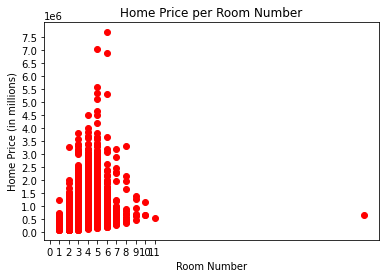

<Figure size 432x288 with 0 Axes>

In [4]:
plt.scatter(df.bedrooms, df.price, color='red')
plt.xlabel('Room Number')
plt.ylabel('Home Price (in millions)')
plt.title('Home Price per Room Number')
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0, 8000000, 500000))
plt.show()
plt.savefig('homepriceperroom.png')

In [5]:
# df = df[['id','price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'lat', 'waterfront', 'floors']]
# df
#picking out the highest correlated variables

In [6]:
df.isna().sum()
#checking nan values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.nunique().sort_values(ascending=False)

id               21420
sqft_lot          9776
sqft_lot15        8682
lat               5033
price             3622
sqft_living       1034
sqft_above         942
sqft_living15      777
long               751
date               372
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           29
bedrooms            12
grade               11
floors               6
condition            5
view                 5
waterfront           2
dtype: int64

In [8]:
df.condition.sort_values(ascending=False)
#checking the values on condition

4757     5
4041     5
16546    5
16544    5
16534    5
        ..
1732     1
13616    1
7369     1
15698    1
17791    1
Name: condition, Length: 21597, dtype: int64

In [9]:
df = df.dropna()
df
#dropping nan values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [10]:
df.isna().sum()
#making sure theyre gone

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df['price'].sort_values(ascending = False)
#checking variables to see if anything wierd

7245     7700000.0
3910     7060000.0
9245     6890000.0
1446     5350000.0
1162     5110000.0
           ...    
16700      85000.0
3763       84000.0
18453      83000.0
2139       82500.0
8267       82000.0
Name: price, Length: 15762, dtype: float64

In [12]:
df.loc[[15856]]
#locating 33 bedroom entry

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [13]:
df = df.drop(labels=15856, axis=0)
df
#dropping it 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [14]:
df["date"] = df.date.apply(lambda x: x[-4:])
type(df['date'])

pandas.core.series.Series

In [15]:
df = df.replace('?',np.nan)

In [16]:
df = df.dropna()

In [17]:
df.sqft_basement

1         400.0
3         910.0
4           0.0
5        1530.0
8         730.0
          ...  
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: sqft_basement, Length: 15428, dtype: object

In [18]:
df.grade.sort_values(ascending=False)

4807     13
5446     13
7028     13
7245     13
13687    13
         ..
9632      4
8614      4
11488     4
3578      4
3220      3
Name: grade, Length: 15428, dtype: int64

In [19]:
df = df.drop(labels=3220, axis=0)

In [20]:
df.describe()
#more description

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542700e+04,1.542700e+04,15427.000000,15427.000000,15427.000000,1.542700e+04,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000,15427.000000
mean,4.594108e+09,5.415095e+05,3.377001,2.121621,2085.648214,1.528691e+04,1.494620,0.007519,0.228884,3.410773,7.664549,1793.836650,1971.135412,81.777144,98077.474039,47.559274,-122.213516,1991.011927,12862.851040
std,2.874870e+09,3.730385e+05,0.903103,0.766992,919.514813,4.200002e+04,0.538908,0.086390,0.759947,0.651616,1.173220,829.133477,29.286308,395.693239,53.460815,0.138722,0.140475,684.799894,27785.256487
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125730e+09,3.204500e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469150,-122.328000,1490.000000,5100.000000
50%,3.905090e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7626.000000
75%,7.334501e+09,6.437250e+05,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677550,-122.124000,2370.000000,10108.000000
max,9.895000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

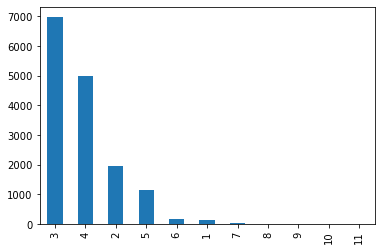

In [21]:
df['bedrooms'].value_counts().plot(kind='bar')
#count of bedrooms

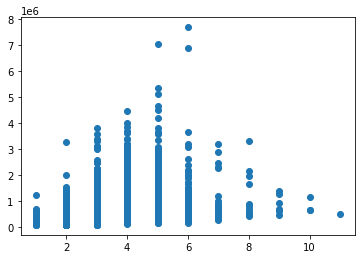

In [22]:
plt.scatter(df.bedrooms, df.price)
#bedrooms vs price

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error as mse

price            1.000000

sqft_living      0.701917

grade            0.667951

sqft_above       0.605368

sqft_living15    0.585241

bathrooms        0.525906

view             0.395734

bedrooms         0.308787

lat              0.306692

waterfront       0.276295

floors           0.256804

yr_renovated     0.129599

sqft_lot         0.089876

sqft_lot15       0.082845

yr_built         0.053953

condition        0.036056

long             0.022036

id              -0.016772

zipcode         -0.053402

In [24]:
reg = LinearRegression()
y = df['price']
X = df.drop(['id', 'price'], axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [26]:
df['grade'].value_counts()

7     6404
8     4338
9     1875
6     1454
10     816
11     286
5      161
12      66
4       16
13      11
Name: grade, dtype: int64

In [27]:
df.grade

1         7
3         7
4         8
5        11
8         7
         ..
21591     8
21592     8
21593     8
21594     7
21596     7
Name: grade, Length: 15427, dtype: int64

In [28]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade']])
transformed_train = encoder.transform(X_train[['view', 'grade']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade',], axis = 1), test_condition], axis = 1)

In [29]:
X_train['grade'].value_counts()

7     4801
8     3271
9     1410
6     1107
10     576
11     216
5      124
12      46
4       13
13       6
Name: grade, dtype: int64

In [30]:
X_test['grade'].value_counts()

7     1603
8     1067
9      465
6      347
10     240
11      70
5       37
12      20
13       5
4        3
Name: grade, dtype: int64

In [31]:
X_train_encoded

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,x1_4,x1_5,x1_6,x1_7,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13
16347,2014,3,1.50,1460,11100,1.0,0.0,3,1460,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
560,2014,4,3.00,2230,108900,1.0,0.0,3,1410,820.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,2015,4,3.00,2420,4800,1.5,0.0,3,1520,900.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7170,2014,2,2.50,2410,7500,1.0,0.0,3,1550,860.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5353,2014,3,2.50,1800,3253,2.0,0.0,3,1800,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,2015,4,2.75,1930,13041,1.0,0.0,4,1180,750.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18757,2014,2,1.00,1150,5695,1.0,0.0,4,1150,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7538,2015,4,4.50,5250,48352,2.0,0.0,3,5250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1181,2014,3,3.50,3250,6000,2.0,0.0,3,2500,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
reg.fit(X_train_encoded, y_train)

LinearRegression()

In [33]:
reg.score(X_train_encoded, y_train)

0.7339256729935926

In [34]:
reg.score(test_condition, y_test)

0.7184981968957638

In [35]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [36]:
np.sqrt(mse(y_train, train_preds))

185625.81240671163

In [37]:
mse(y_test, test_preds, squared=False)

217398.4034273473

In [38]:
list(zip(df.columns, reg.coef_))

[('id', 28389.34825133962),
 ('date', -19627.11657040166),
 ('price', 43294.74070432128),
 ('bedrooms', 85.81741200003236),
 ('bathrooms', 0.12536179420889218),
 ('sqft_living', 27489.517878338735),
 ('sqft_lot', 513418.2407923349),
 ('floors', 34818.64882981517),
 ('waterfront', 44.482808576110294),
 ('view', 41.33461442724234),
 ('condition', -2127.4387773273297),
 ('grade', 36.274345829493114),
 ('sqft_above', -549.3614836078301),
 ('sqft_basement', 622830.3244833377),
 ('yr_built', -193918.10331314316),
 ('yr_renovated', 26.80383824573414),
 ('zipcode', -0.40889474110112956),
 ('lat', -114589.28046763343),
 ('long', 28437.60441170103),
 ('sqft_living15', -41405.25117313598),
 ('sqft_lot15', 5492.101290883931)]

In [39]:
df2 = df.copy()

(array([1.361e+04, 1.511e+03, 2.090e+02, 6.600e+01, 2.100e+01, 4.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([  82000.,  843800., 1605600., 2367400., 3129200., 3891000.,
        4652800., 5414600., 6176400., 6938200., 7700000.]),
 <BarContainer object of 10 artists>)

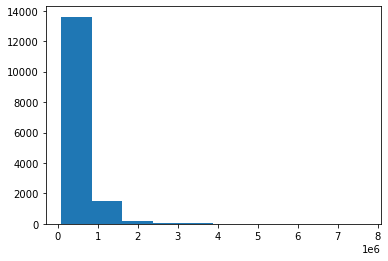

In [40]:
plt.hist(df2.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x12dd29df0>,
 'caps': [<matplotlib.lines.Line2D at 0x10cbe8e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x12dd29b50>],
 'medians': [<matplotlib.lines.Line2D at 0x10cbe8160>],
 'fliers': [<matplotlib.lines.Line2D at 0x10cbe88e0>],
 'means': []}

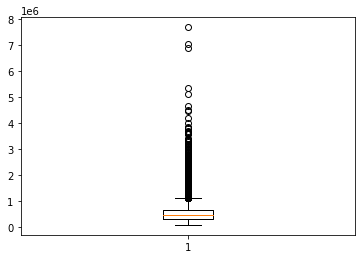

In [41]:
plt.boxplot(df2.price)

Text(0.5, 0, 'Prices')

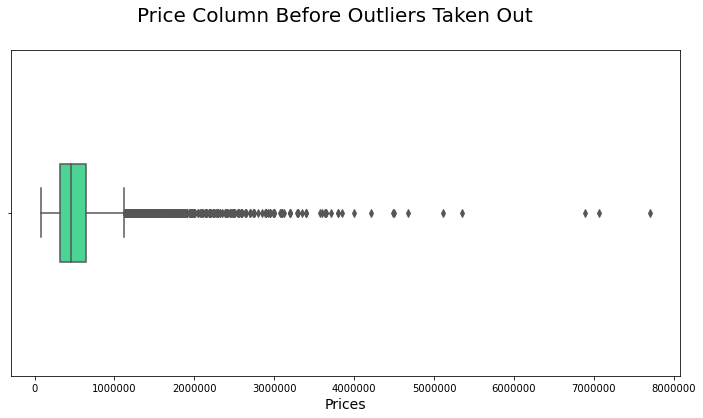

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
plt.ticklabel_format(style="plain")
sns.boxplot(x=df2.price, width = .3, color = '#34eb95');
plt.suptitle("Price Column Before Outliers Taken Out", fontsize=20)
plt.xlabel("Prices", fontsize=14)

In [43]:
df2.price

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
8         229500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15427, dtype: float64

In [44]:
from scipy.stats import zscore
from scipy.stats import stats
z_scores = stats.zscore(df2.price) 
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df2_price = df2.price[filtered_entries]
new_df2_price

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
8         229500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15151, dtype: float64

In [45]:
df2_copy = df2[filtered_entries].copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1328f0100>,
 'caps': [<matplotlib.lines.Line2D at 0x1328f07c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x132921d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1328f0e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1335a5220>],
 'means': []}

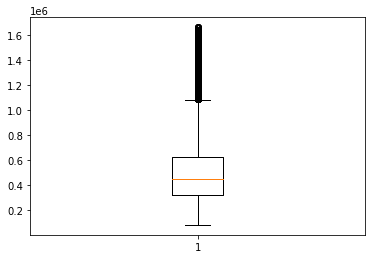

In [46]:
plt.boxplot(new_df2_price)

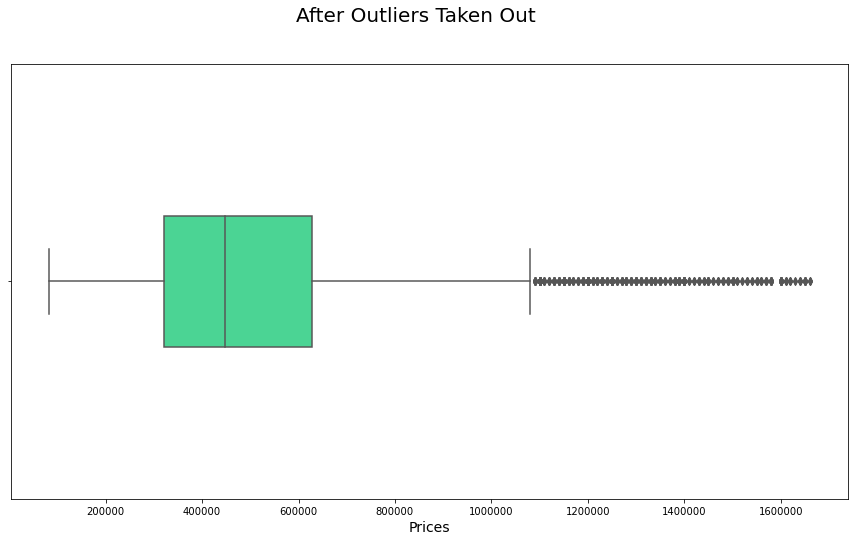

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=new_df2_price, width = .3, color = '#34eb95');
plt.suptitle("After Outliers Taken Out", fontsize=20)
plt.xlabel("Prices", fontsize=14)
plt.savefig('afteroutlierstakenout.png')

In [48]:
reg_without_outliers = LinearRegression()
y = new_df2_price
X = df2_copy.drop(['id', 'price'], axis = 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [50]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [51]:
reg_without_outliers.fit(X_train,y_train)

LinearRegression()

In [52]:
reg_without_outliers.fit(X_train_encoded, y_train)

LinearRegression()

In [53]:
reg_without_outliers.score(X_train_encoded, y_train)

0.8477290572835575

In [54]:
reg_without_outliers.score(test_condition, y_test)

0.8473790368289617

In [55]:
X_train_encoded

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,x2_98146,x2_98148,x2_98155,x2_98166,x2_98168,x2_98177,x2_98178,x2_98188,x2_98198,x2_98199
16107,2014,4,2.25,1720,8300,1.0,0.0,4,1720,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16473,2015,3,1.00,1260,3230,1.5,0.0,3,1260,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21327,2014,3,1.50,2580,47480,1.0,0.0,3,1360,1220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8298,2014,5,3.50,3430,6872,2.0,0.0,3,2830,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11393,2014,4,2.75,2620,13777,1.5,0.0,4,1720,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,2015,3,2.50,2095,3438,2.0,0.0,3,2095,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19078,2014,3,2.25,2530,27227,2.0,0.0,3,2530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7666,2015,3,3.00,3270,38088,2.0,0.0,3,3270,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1200,2014,3,1.75,1490,3800,1.0,0.0,3,700,790.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
train_preds = reg_without_outliers.predict(X_train_encoded)
test_preds = reg_without_outliers.predict(test_condition)

In [57]:
np.sqrt(mse(y_train, train_preds))

101155.68187067893

In [58]:
mse(y_test, test_preds, squared=False)

105763.01912913867

In [59]:
df3 = df2_copy

In [60]:
df2_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [61]:
linreg = LinearRegression()

In [62]:
y = new_df2_price
X = df3.drop(['id', 'price', 'bedrooms'], axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [64]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [65]:
linreg.fit(X_train,y_train)

LinearRegression()

In [66]:
linreg.fit(X_train_encoded, y_train)

LinearRegression()

In [67]:
linreg.score(X_train_encoded, y_train)

0.8475885629639406

In [68]:
linreg.score(test_condition, y_test)

0.8470426150969363

In [69]:
train_preds = linreg.predict(X_train_encoded)
test_preds = linreg.predict(test_condition)

In [70]:
np.sqrt(mse(y_train, train_preds))

101202.3372659663

In [71]:
mse(y_test, test_preds, squared=False)

105879.5214469478

In [72]:
df4 = df3.copy()

In [73]:
lrm = LinearRegression()

In [74]:
y = new_df2_price
X = df4.drop(['id', 'price', 'yr_renovated'], axis = 1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [76]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade', 'zipcode']])
transformed_train = encoder.transform(X_train[['view', 'grade', 'zipcode']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade', 'zipcode'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade', 'zipcode']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade', 'zipcode'], axis = 1), test_condition], axis = 1)

In [77]:
lrm.fit(X_train,y_train)

LinearRegression()

In [78]:
lrm.fit(X_train_encoded, y_train)

LinearRegression()

In [79]:
lrm.score(X_train_encoded, y_train)

0.846879758241037

In [80]:
lrm.score(test_condition, y_test)

0.8453564587473171

In [81]:
train_preds = lrm.predict(X_train_encoded)
test_preds = lrm.predict(test_condition)

In [82]:
np.sqrt(mse(y_train, train_preds))

101437.39012471554

In [83]:
mse(y_test, test_preds, squared=False)

106461.51396447132

In [84]:
df5 = df4.copy()

In [85]:
df5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [86]:
df5.bathrooms.sort_values(ascending=False)

8537     7.50
21328    6.00
21034    6.00
15737    5.75
20436    5.50
         ... 
860      0.75
19183    0.75
11662    0.50
2259     0.50
10413    0.50
Name: bathrooms, Length: 15151, dtype: float64

In [87]:
df5 = df5.drop(labels=8537)

In [88]:
df5.sqft_basement

1         400.0
3         910.0
4           0.0
5        1530.0
8         730.0
          ...  
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: sqft_basement, Length: 15150, dtype: object

In [89]:
lrm = LinearRegression()

In [90]:
y = df5['price']
X = df5.drop(['id', 'price'], axis = 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [92]:
X_train.bathrooms.value_counts()

2.50    2942
1.00    2004
1.75    1615
2.25    1092
2.00     989
1.50     807
2.75     617
3.00     385
3.50     380
3.25     276
3.75      61
4.00      54
0.75      41
4.50      40
4.25      31
5.00       6
5.25       5
1.25       5
4.75       4
0.50       3
5.50       2
6.00       2
5.75       1
Name: bathrooms, dtype: int64

In [93]:
X_test.bathrooms.sort_values(ascending = False)
#this pulled an error from 7.5 so i dropped it

16789    5.25
18412    5.25
1658     5.00
14885    5.00
3717     4.75
         ... 
12997    0.75
9811     0.75
12038    0.75
21594    0.75
12063    0.75
Name: bathrooms, Length: 3788, dtype: float64

In [96]:
encoding_list = ['view', 'grade', 'zipcode', 'bathrooms']

In [97]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[encoding_list])

transformed_train = encoder.transform(X_train[encoding_list])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(encoding_list, axis = 1), transformed_train], axis = 1)

test_condition = encoder.transform(X_test[encoding_list])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(encoding_list, axis = 1), test_condition], axis = 1)

In [98]:
lrm.fit(X_train,y_train)

LinearRegression()

In [99]:
lrm.fit(X_train_encoded, y_train)

LinearRegression()

In [100]:
lrm.score(X_train_encoded, y_train)

0.8503445737189369

In [101]:
lrm.score(test_condition, y_test)

0.846709308151527

In [102]:
train_preds = lrm.predict(X_train_encoded)
test_preds = lrm.predict(test_condition)

In [103]:
np.sqrt(mse(y_train, train_preds))

101415.64357808855

In [104]:
mse(y_test, test_preds, squared=False)

102664.71233046142